<a href="https://colab.research.google.com/github/lilika67/linear_regression_model/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1**
importing all necessary libraries that are needed for data manipulation ans also for predictive data analysis





In [30]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Training model and comparison
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.model_selection import train_test_split



**Step 2**

Loaded and read the data from the dataset

In [40]:
# Load data
path = "/content/drive/My Drive/data/cropyield_df.csv"
data = pd.read_csv(path)

**Step 3**
displayed few columns from my dataset to see its over view


In [41]:
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


**Step 4** **Data processing** **and Data Preparation.**

 separated x_features that the model will use for predictions  and y_targets as the outcome the model is predicting.

I also converted categorical item column to numerical data so that machine learning algorithm can process it

In [42]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'Area']),

In [43]:
df = data[0]

In [45]:
# Separate features (X) and target (y)
X = df[['Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df['hg/ha_yield']




In [28]:
# One-hot encode the categorical 'Item' column to numerical data
X_encoded = pd.get_dummies(X, columns=['Item'], drop_first=True).astype(int)

In [46]:
X_encoded.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485,121,16,1,0,0,0,0,0,0,0,0
1,1990,1485,121,16,0,0,1,0,0,0,0,0,0
2,1990,1485,121,16,0,0,0,1,0,0,0,0,0
3,1990,1485,121,16,0,0,0,0,1,0,0,0,0
4,1990,1485,121,16,0,0,0,0,0,1,0,0,0


In [48]:
df[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].describe()


,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627
std,7.051905,709.81215,59958.784665,6.312051
min,1990.000000,51.00000,0.040000,1.300000
25%,1995.000000,593.00000,1702.000000,16.702500
50%,2001.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,1668.00000,48687.880000,26.000000
max,2013.000000,3240.00000,367778.000000,30.650000


In [49]:
df['Item'].unique()


array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

**Step 5**

Data visualization using correlation heat map , histogram and box plot


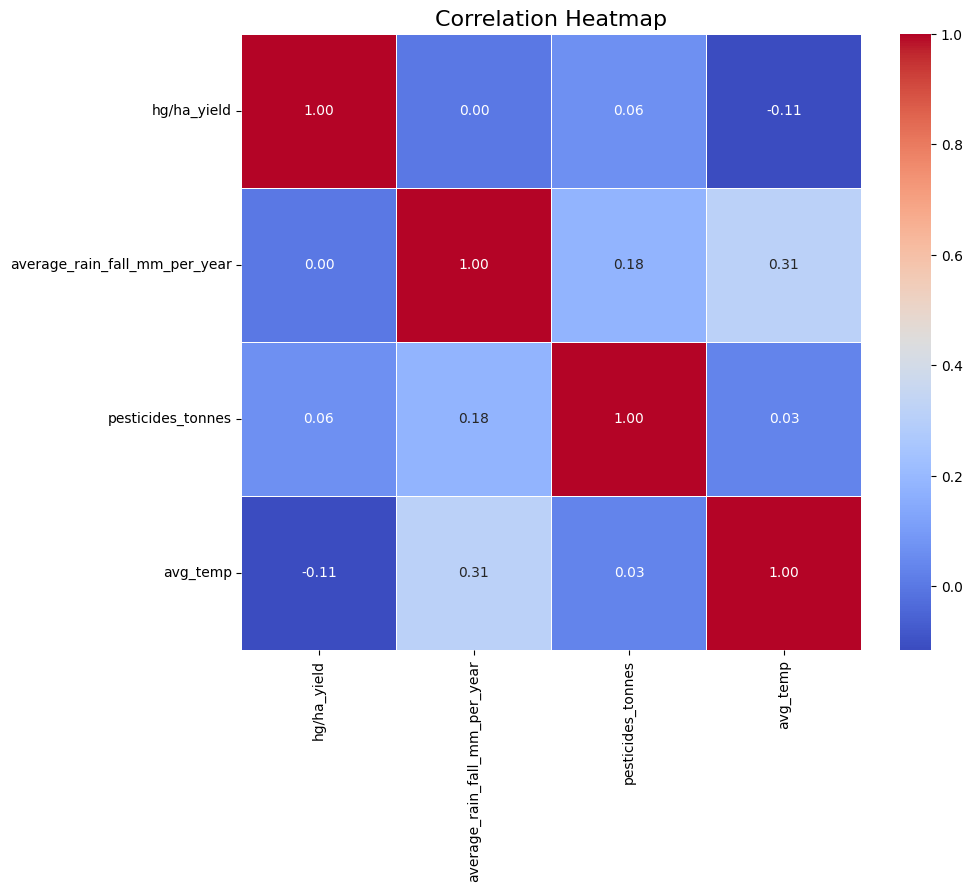

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculation of the correlation matrix for numerical columns
correlation_matrix = df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].corr()

# Set up for the figure for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels for clarity
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


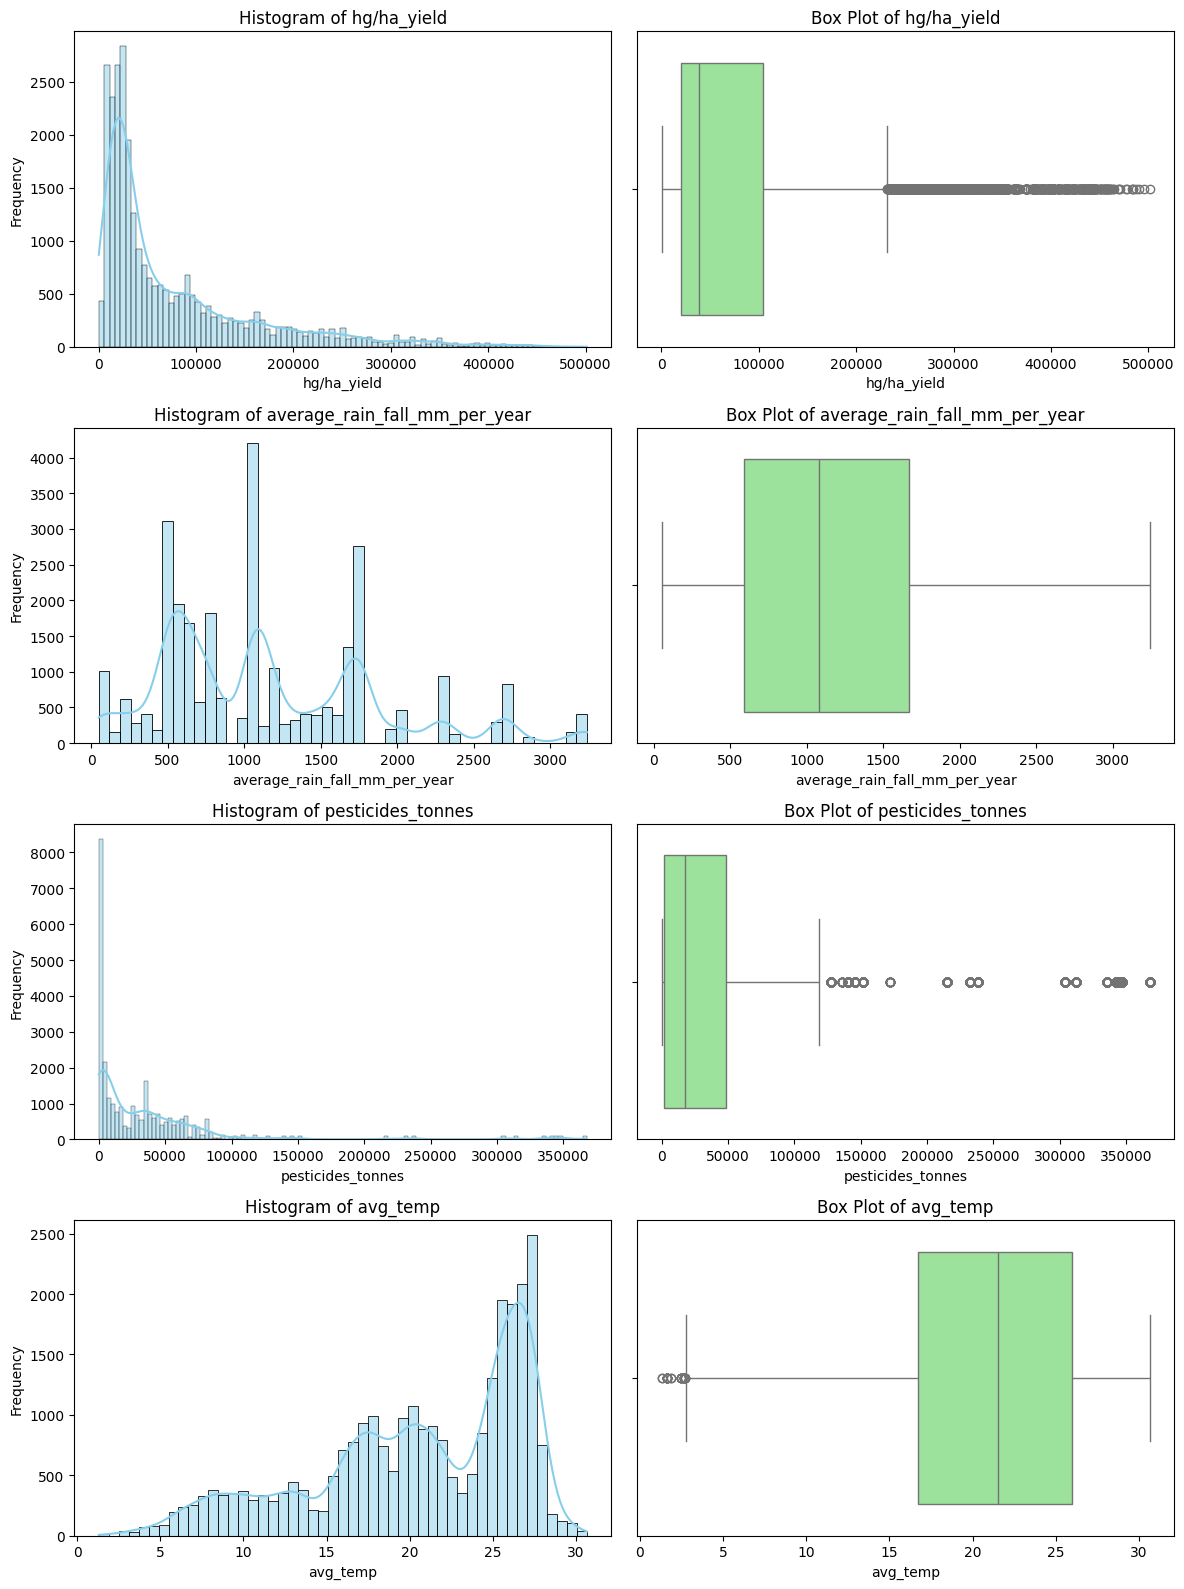

In [54]:
# Define numerical columns for visualization
numerical_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

# Set up the figure for histograms and box plots
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 16))

# Create histograms and box plots for each numerical column
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[column], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(x=df[column], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_xlabel(column)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


**Step 6**

 Split data into 80% training and 20% testing

 Comparing linear regression model, decision trees, and random forest

 Saving the BEST performing model based on the loss metric

In [55]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [56]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    results[model_name] = rmse

# Display model performance
print("Model performance (RMSE):", results)

Model performance (RMSE): {'Linear Regression': 50283.0393755534, 'Decision Tree': 13041.699621781785, 'Random Forest': 10279.18730219524}


Saving the best model with low loss metric/ root mean square error
(RMSE)

In [57]:
import joblib

# Identify the best model based on RMSE
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Save the best model
model_path = '/best_model.pkl'  # Specify the path where you want to save the model
joblib.dump(best_model, model_path)

print(f"Best model: {best_model_name} with RMSE of {results[best_model_name]}")
print(f"Model saved at: {model_path}")


Best model: Random Forest with RMSE of 10279.18730219524
Model saved at: /best_model.pkl


Visualization using scatter plot


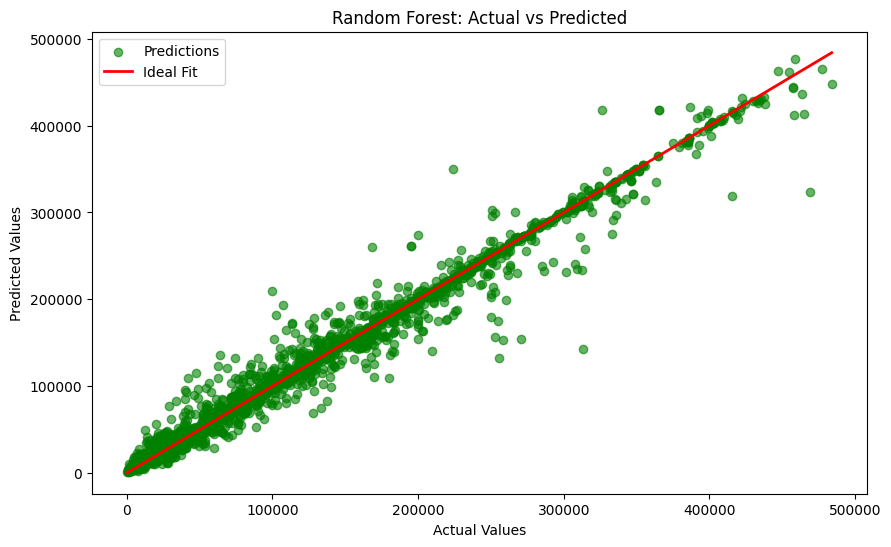

In [58]:
import matplotlib.pyplot as plt

# predictions with the best model
y_pred = best_model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')  # Ideal fit line

# plot labels and legend
plt.title(f'{best_model_name}: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


**Step 6**

Created a script that uses the best model model to make a prediction of crop yield


In [59]:


# Load the best model
model = joblib.load('/best_model.pkl')

# Function to make a yield prediction
def predict_yield(crop_type, year, avg_rainfall, pesticides, avg_temp):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'crop_type':[crop_type],
        'Year': [year],
        'average_rain_fall_mm_per_year': [avg_rainfall],
        'pesticides_tonnes': [pesticides],
        'avg_temp': [avg_temp]
    })

    # One-hot encode the crop type
    crop_dummies = pd.get_dummies(pd.Series([crop_type]), prefix='Item')
    input_data = pd.concat([input_data, crop_dummies], axis=1)


    for col in X_encoded.columns:
        if col not in input_data.columns:
            input_data[col] = 0

    input_data = input_data[X_encoded.columns]

    # Make a prediction
    yield_prediction = model.predict(input_data)[0]
    return yield_prediction

# Example
predicted_yield = predict_yield('Maize', 2023, 344, 56, 24)
print(f"Predicted Yield: {predicted_yield} hg/ha")


Predicted Yield: 10241.95 hg/ha
